In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import h5py

from models.functions.data_loader import GeologyTracesDataset
from models.functions.fno_model import FNO_3D
from models.functions.uno_model import UNO_3D
from models.functions.gfno_model import GFNO_3D
from models.functions.ffno_model import FFNO_3D

%matplotlib widget

This notebook load each trained model and plot the predictions. 

In [2]:
S_in = 32 # Number of spatial points in inputs (dimensions x and y)
S_in_z = 32 # Number of vertical points in inputs (dimension z)
S_out = 32 # Number of spatial points in outputs (dimensions x and y)
T_out = 320 # Number of timesteps
dt = 0.02 # Time step in seconds

Load data

In [3]:
val_data = GeologyTracesDataset('./models/inputs/', ['inputs3D_S32_Z32_T320_fmax5_val'], 
                                S_in=S_in, S_in_z=S_in_z, S_out=S_out, T_out=T_out,
                                transform_a='normal', N=5)

val_loader = torch.utils.data.DataLoader(val_data,
                                         batch_size=1,
                                         shuffle=False)

# Load models

You should load only one model by running its corresponding cell, and then plot its predictions. 

### FNO model

In [4]:
dv = 16 # Number of channels after the uplift
in_width = 6 # Number of channels after the grid concatenation
list_dv = [16, 16, 16, 16] # Number of channels after each block
list_D1 = [32, 32, 32, 32] # Dimensions along the 1st dimension after each block
list_D2 = [32, 32, 32, 32] # Dimensions along the 2nd dimension after each block
list_D3 = [64, 128, 256, 320] # Dimensions along the 3rd dimension after each block
list_M1 = [16, 16, 16, 16] # Number of modes along the 1st dimension after each block
list_M2 = [16, 16, 16, 16] # Number of modes along the 2nd dimension after each block
list_M3 = [16, 32, 32, 32] # Number of modes along the 3rd dimension after each block
model_name = 'FNO'

# build the model
model = FNO_3D(in_width, dv, S_in, list_dv, list_D1, list_D2, list_D3, list_M1, list_M2, list_M3, padding=0)

# load the weights from the trained model
epochs = 158
name_config = f'FNO3D-dv{dv}-S{S_in}-T{T_out}-learningrate0p0006-L1loss1p0-L2loss0p0-Ntrain27000-batchsize16'
model.load_state_dict(torch.load(f'./models/logs/models/bestmodel-{name_config}-epochs{epochs}.pt', map_location='cpu'))
model.eval()

# Get the loss history
loss_history = h5py.File(f'./models/logs/loss/loss-{name_config}-epochs{epochs}.h5', 'r')

### UNO model

In [5]:
dv = 16 # Number of channels after the uplift
in_width = 6 # Number of channels after the grid concatenation
list_dv = [16, 16, 16, 16, 16, 16, 16, 16] # Number of channels after each block
list_D1 = [24, 18, 13, 8, 13, 18, 24, 32] # Dimensions along the 1st dimension after each block
list_D2 = [24, 18, 13, 8, 13, 18, 24, 32] # Dimensions along the 2nd dimension after each block
list_D3 = [24, 18, 13, 8, 17, 34, 64, 320] # Dimensions along the 3rd dimension after each block
list_M1 = [12, 9, 6, 4, 4, 6, 9, 12, 12] # Number of modes along the 1st dimension after each block
list_M2 = [12, 9, 6, 4, 4, 6, 9, 12, 12] # Number of modes along the 2nd dimension after each block
list_M3 = [12, 9, 7, 5, 5, 9, 17, 20, 20] # Number of modes along the 3rd dimension after each block
model_name = 'U-NO'

# build the model
model = UNO_3D(in_width, dv, S_in, list_dv, list_D1, list_D2, list_D3, list_M1, list_M2, list_M3, padding=0)

# load the weights from the trained model
epochs = 200
name_config = f'UNO3D-dv{dv}-S{S_in}-T{T_out}-learningrate0p0006-L1loss1p0-L2loss0p0-Ntrain27000-batchsize16'
model.load_state_dict(torch.load(f'./models/logs/models/bestmodel-{name_config}-epochs{epochs}.pt', map_location='cpu'))
model.eval()

# Get the loss history
loss_history = h5py.File(f'./models/logs/loss/loss-{name_config}-epochs{epochs}.h5', 'r')

### G-FNO model

In [6]:
dv = 11 # Number of channels after the uplift
num_channels = 1 # Number of channels in inputs
list_dv = [16, 16, 16, 16] # Number of channels after each block
list_D = [32, 32, 32, 32] # Dimensions along the 1st and 2nd dimension after each block
list_D3 = [64, 128, 256, 320] # Dimensions along the 3rd dimension after each block
list_M = [8, 8, 8, 8] # Number of modes along the 1st and 2nd dimension after each block
list_M3 = [8, 8, 8, 8] # Number of modes along the 3rd dimension after each block
model_name = 'G-FNO'

# build the model
model = model = GFNO_3D(num_channels, T_out, list_D, list_D3, list_M, list_M3, width=dv, padding=0, 
                        initial_step=1, reflection=False, grid_type='cartesian')

# load the weights from the trained model
epochs = 182
name_config = f'GFNO3D-dv{dv}-S{S_in}-T{T_out}-padding0-learningrate0p0001-L1loss1p0-L2loss0p0-Ntrain27000-batchsize16'\
'-modes8-modestime8'
model.load_state_dict(torch.load(f'./models/logs/models/bestmodel-{name_config}-epochs{epochs}.pt', map_location='cpu'))
model.eval()

# Get the loss history
loss_history = h5py.File(f'./models/logs/loss/loss-{name_config}-epochs{epochs}.h5', 'r')

### F-FNO model

In [29]:
nlayers = 4 # Number of layers
dv = 16 # Number of channels after the uplift
list_dv = [16]*nlayers # Number of channels after each block
list_D1 = [32]*nlayers # Dimensions along the 1st dimension after each block
list_D2 = [32]*nlayers # Dimensions along the 2nd dimension after each block
list_D3 = [32]*(nlayers-4) + [64, 128, 256, 320] # Dimensions along the 3rd dimension after each block
list_M1 = [16]*nlayers # Number of modes along the first dimension after each block
list_M2 = [16]*nlayers # Number of modes along the first dimension after each block
list_M3 = [16]*(nlayers-4) + [16, 32, 32, 32] # Number of modes along the first dimension after each block
model_name = 'F-FNO'

# build the model
model = FFNO_3D(list_D1, list_D2, list_D3,
                list_M1, list_M2, list_M3, dv, 
                input_dim=4, # to define the uplift network (last dimension after grid concatenation)
                output_dim=1, # to define the projection network (last dimension after projection)
                n_layers=nlayers, padding = 0)

# load the weights from the trained model
epochs = 350
name_config = f'FFNO3D-dv{dv}-{nlayers}layers-S{S_in}-T{T_out}-padding0-learningrate0p0006-L1loss1p0-L2loss0p0'\
'-Ntrain27000-batchsize16'
model.load_state_dict(torch.load(f'./models/logs/models/bestmodel-{name_config}-epochs{epochs}.pt', map_location='cpu'))
model.eval()

# Get the loss history
loss_history = h5py.File(f'./models/logs/loss/loss-{name_config}-epochs{epochs}.h5', 'r')

# Plots

Load data for the sample indexed by `element`. 

In [24]:
element = 1

a, uE, uN, uZ = val_data[element]

outE, outN, outZ = model(torch.tensor(np.expand_dims(a, axis=0), device='cpu'))
outE = outE.detach().cpu().numpy()[0, :, :, :, 0]
outN = outN.detach().cpu().numpy()[0, :, :, :, 0]
outZ = outZ.detach().cpu().numpy()[0, :, :, :, 0]

uE = uE[:, :, :, 0]
uN = uN[:, :, :, 0]
uZ = uZ[:, :, :, 0]

Plot the loss history of the model. The loss computed during training is the sum of the loss on the three components. It is divided by 3 to get the mean loss of the components. 

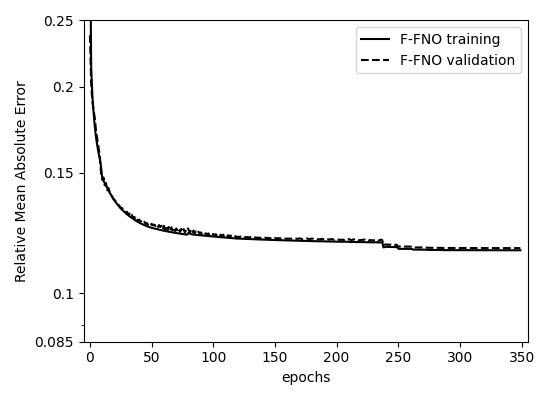

In [30]:
ylims = [0.085, 0.25]
yticks = [0.085, 0.1, 0.15, 0.2, 0.25]

fig, ax = plt.subplots(figsize=(5.5, 4))
ax.semilogy((1/3)*loss_history['train_loss_relative'][:], 'k', label=f'{model_name} training')
ax.semilogy((1/3)*loss_history['val_loss_relative'][:], 'k--', label=f'{model_name} validation')

ax.set_xlim([-5, epochs+5])
ax.set_ylim(ylims)
ax.legend(loc='upper right')
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)

ax.set_xlabel('epochs')
ax.set_ylabel('Relative Mean Absolute Error')
fig.tight_layout()
plt.show()

For one spatial point indexed by `(isensor_x, isensor_y)`, plot the timeseries of each component (East-West, North-South, Vertical).

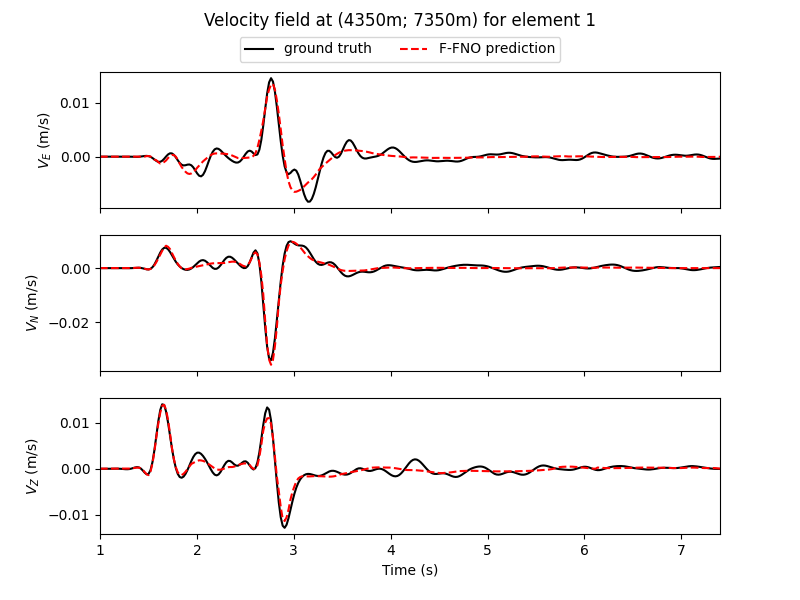

In [25]:
isensor_x = 14 # integer between 0 and 31
isensor_y = 24 # integer between 0 and 31
sensor_x = np.linspace(150, 9450, 32)[isensor_x]
sensor_y = np.linspace(150, 9450, 32)[isensor_y]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8,6))
ax1.plot(np.linspace(1, 7.4, 320), uE[isensor_y, isensor_x,:], 'k', label='ground truth')
ax1.plot(np.linspace(1, 7.4, 320), outE[isensor_y, isensor_x,:], 'r--', label = f'{model_name} prediction')
ax1.set_ylabel('$V_E$ (m/s)')

ax2.plot(np.linspace(1, 7.4, 320), uN[isensor_y, isensor_x,:], 'k')
ax2.plot(np.linspace(1, 7.4, 320), outN[isensor_y, isensor_x,:], 'r--')
ax2.set_ylabel('$V_N$ (m/s)')

ax3.plot(np.linspace(1, 7.4, 320), uZ[isensor_y, isensor_x,:], 'k')
ax3.plot(np.linspace(1, 7.4, 320), outZ[isensor_y, isensor_x,:], 'r--')

ax3.set_ylabel('$V_Z$ (m/s)')
ax3.set_xlim([1, 7.4])
ax3.set_xlabel('Time (s)')
fig.suptitle(f'Velocity field at ({int(sensor_x)}m; {int(sensor_y)}m) for element {element}')
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncols=2)

plt.show()

Plot snapshots at a given time `t`. 

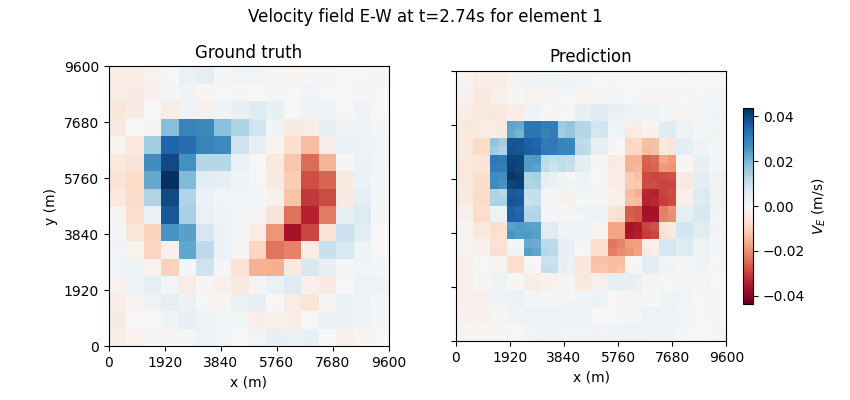

In [28]:
t = 2.74 # real time in seconds
it = int((t-1)/dt) # time index
m = np.max(np.abs(uE[:, :, it]))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8.5, 4), sharex=True, sharey=True)
im = ax1.imshow(uE[:, :, it], vmin = -m, vmax=m, cmap='RdBu', origin='lower', interpolation='none')
im = ax2.imshow(outE[:, :, it], vmin = -m, vmax=m, cmap='RdBu', origin='lower', interpolation='none')

fig.colorbar(im, ax=ax2, label = '$V_E$ (m/s)', shrink=0.7)

ticks = np.linspace(-0.5, 31.5, 6)
ax1.set_xticks(ticks)
ax1.set_xticklabels((300*(ticks+0.5)).astype(int))
ax1.set_xlabel('x (m)')

ax2.set_xticks(ticks)
ax2.set_xticklabels((300*(ticks+0.5)).astype(int))
ax2.set_xlabel('x (m)')

ax1.set_yticks(ticks)
ax1.set_yticklabels((300*(ticks+0.5)).astype(int))
ax1.set_ylabel('y (m)')

ax1.set_title('Ground truth')
ax2.set_title('Prediction')
fig.suptitle(f'Velocity field E-W at t={t:.2f}s for element {element}')

fig.tight_layout()
plt.show()